In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from yellowbrick.features import PCA as YBPCA
from kneed import KneeLocator
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
#import plotly.express as px

In [3]:
bike_summer = pd.read_csv("bike_summer.csv")
bike_summer.head()

,Unnamed: 0,datetime,date,hour,season,holiday,open,rent_count,temperature,humidity,wind_speed,visibility,dewpoint_temp,solar_radiation,rainfall,snowfall
0,1,2018-06-01 00:00:00,2018-06-01,0,Summer,No Holiday,Yes,963,20.1,63,1.1,16980,12.8,0.0,0.0,0
1,2,2018-06-01 01:00:00,2018-06-01,1,Summer,No Holiday,Yes,776,19.5,65,0.4,16620,12.7,0.0,0.0,0
2,3,2018-06-01 02:00:00,2018-06-01,2,Summer,No Holiday,Yes,554,19.0,72,1.4,12580,13.8,0.0,0.0,0
3,4,2018-06-01 03:00:00,2018-06-01,3,Summer,No Holiday,Yes,366,18.6,72,1.4,13400,13.4,0.0,0.0,0
4,5,2018-06-01 04:00:00,2018-06-01,4,Summer,No Holiday,Yes,265,18.1,76,1.8,5610,13.7,0.0,0.0,0


In [4]:
bike_summer_col = list(bike_summer.columns)
bike_summer_numeric_col = list(bike_summer.describe().columns)
diff_names = []
for i in bike_summer_col:
	if i not in bike_summer_numeric_col:
		diff_names.append(i)
diff_names

['datetime', 'date', 'season', 'holiday', 'open']

In [5]:
bike_summer2 = bike_summer.copy()
bike_summer2.drop(columns = diff_names,inplace=True)
bike_summer2.drop(columns = ['rent_count','dewpoint_temp'], inplace = True)
#bike_summer2.drop(columns = ['rent_count'], inplace = True)
bike_summer2.head()

,Unnamed: 0,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall
0,1,0,20.1,63,1.1,16980,0.0,0.0,0
1,2,1,19.5,65,0.4,16620,0.0,0.0,0
2,3,2,19.0,72,1.4,12580,0.0,0.0,0
3,4,3,18.6,72,1.4,13400,0.0,0.0,0
4,5,4,18.1,76,1.8,5610,0.0,0.0,0


In [10]:
bike_summer3 = bike_summer2.iloc[: , 1:-1] # drop snowfall as std =0
bike_summer3.head()

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall
0,0,20.1,63,1.1,16980,0.0,0.0
1,1,19.5,65,0.4,16620,0.0,0.0
2,2,19.0,72,1.4,12580,0.0,0.0
3,3,18.6,72,1.4,13400,0.0,0.0
4,4,18.1,76,1.8,5610,0.0,0.0


In [11]:
bike_summer3.describe()

,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,11.500000,26.582790,64.981431,1.609420,15017.454710,0.761255,0.253487
std,6.923755,4.662299,17.570961,0.914289,5405.439653,0.999001,1.587507
min,0.000000,16.300000,21.000000,0.000000,700.000000,0.000000,0.000000
25%,5.750000,23.100000,52.000000,0.900000,10767.500000,0.000000,0.000000
50%,11.500000,26.600000,65.000000,1.500000,17405.000000,0.160000,0.000000
75%,17.250000,29.800000,79.000000,2.200000,19990.000000,1.360000,0.000000
max,23.000000,39.400000,98.000000,6.900000,20000.000000,3.450000,29.500000


In [12]:
_ , p_value = calculate_bartlett_sphericity(bike_summer3)
p_value

0.0

In [13]:
_, kmo_score = calculate_kmo(bike_summer3)
kmo_score 

0.7001904632094446

In [14]:
colnames = list(bike_summer3.columns)

scaler = StandardScaler(with_mean=True,with_std=True)
scaled_features = pd.DataFrame(scaler.fit_transform(bike_summer3))

scaled_features.columns = colnames

In [15]:
N = 7
pca = PCA(n_components=N)
pca.fit(scaled_features)

PCA(n_components=7)

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(np.round(explained_variance_ratio, decimals=3))

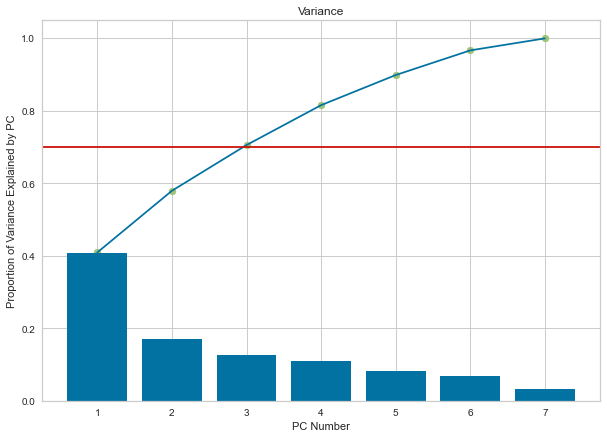

In [17]:
x = list(range(1,N+1))
plt.figure(figsize=(10, 7)) 
plt.bar(x,explained_variance_ratio)
plt.scatter(range(1,N+1),cumulative_variance)
plt.plot(x,cumulative_variance)
plt.title('Variance')
plt.xlabel('PC Number')
plt.ylabel('Proportion of Variance Explained by PC')
plt.axhline(y=0.7, color = 'r')

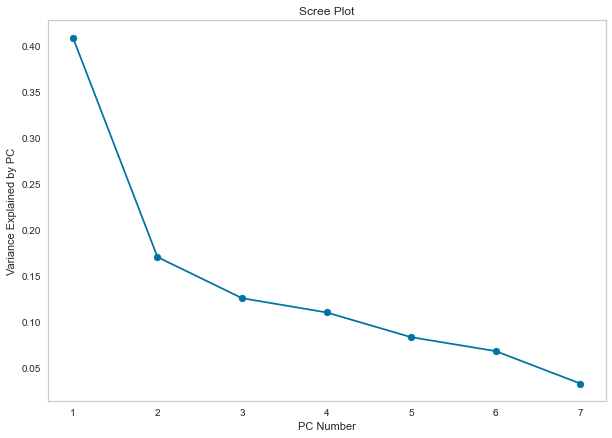

In [18]:
plt.figure(figsize=(10, 7)) 
plt.scatter(range(1,N+1),pca.explained_variance_ratio_)
plt.plot(range(1,N+1),pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('PC Number')
plt.ylabel('Variance Explained by PC')
plt.grid()

In [19]:
kl = KneeLocator(range(1, N+1), pca.explained_variance_ratio_, curve="convex", direction="decreasing")

kl.elbow

2

In [20]:
def evaluate_pcs(num_of_pcs,data):
    def encode_vals(x): #helper functions to suppress loading less than 0.7 
    #a gradual process to lead to this function
    # if x<=-0.5, we drop the variable
        if x <= -0.5 or x >= 0.5: #Adjust the threshold value 
            return x
        else:
            return("")    
    f = FactorAnalyzer(n_factors=num_of_pcs, method = 'principal',rotation='varimax') #Conduct PCA + varimax rotation to extract latent factors 
    f.fit(data)
    loadings = pd.DataFrame(f.loadings_).set_index(data.columns)
    loadings = loadings.applymap(encode_vals)
    loadingcols= list(loadings.columns)
    newcols = {}
    for i in loadingcols:
        newcols[i] = "PC" + str(i+1)
    loadings.rename(columns = newcols,inplace=True)
    return loadings



In [21]:
def CronbachAlpha(itemscores): #calculate the CronbachAlpha to see how closely related a set of items are as a group
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof=1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems / (nitems-1)) * (1 - (itemvars.sum() / tscores.var(ddof=1)))

In [22]:
evaluate_pcs(2,scaled_features[colnames])

,PC1,PC2
hour,0.66496,
temperature,0.684176,
humidity,-0.647323,0.599373
wind_speed,0.721204,
visibility,,-0.716361
solar_radiation,0.698365,
rainfall,,0.761716


In [85]:
print(CronbachAlpha(scaled_features[['hour','temperature','wind_speed','solar_radiation']])) #Reliability of PC1
print(CronbachAlpha(scaled_features[['humidity','rainfall']])) #Reliability of PC2

0.6780119537981936
0.43380119135190576
